In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/dataframes.py
%run ../../load_magic/environment.py
%run ../../load_magic/storage.py
%run ../../load_magic/lists.py
%run ../../load_magic/soup.py
%pprint
import numpy as np

import scraping_utils
wikipedia = scraping_utils.wikipedia

import choropleth_utils
c = choropleth_utils.ChoroplethUtilities()
print(['c.{}'.format(fn) for fn in dir(c) if not fn.startswith('_')])

notebook_path = get_notebook_path()
print(notebook_path)

s = Storage()
maps_dir = os.path.join(s.saves_folder, 'maps')
flags_dir = os.path.join(s.saves_folder, 'flags')
emblems_dir = os.path.join(s.saves_folder, 'emblems')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

text_editor_path = r'C:\Program Files\Notepad++\notepad++.exe'
country_stats_df = s.load_object('country_stats_df')
dir()

Pretty printing has been turned OFF
['c.all_countries_df', 'c.axes_str', 'c.clean_up_district_common_dict', 'c.clean_up_district_merge_dataframe', 'c.clean_up_district_unique_dict', 'c.clean_up_suggestion_list_dict', 'c.conjunctify_list', 'c.copy_file_name', 'c.copy_file_path', 'c.create_country_colored_labeled_map', 'c.create_country_colored_map', 'c.create_country_labeled_map', 'c.create_district_first_dict', 'c.create_label_line_file', 'c.create_us_google_suggest_labeled_map', 'c.district_path_str', 'c.figure_str', 'c.fill_style_prefix', 'c.fill_style_str', 'c.get_colorbar_xml', 'c.get_column_description', 'c.get_google_suggestion_list', 'c.get_legend_xml', 'c.get_style_list', 'c.get_tfidf_lists', 'c.get_tspan_list', 'c.gradient_file_path', 'c.gradient_str', 'c.height_ratio', 'c.html_style_str', 'c.hyphen_dict', 'c.hyphenate_words', 'c.intra_country_borders_str', 'c.iso_3166_2_code', 'c.l_str', 'c.label_line_file_path', 'c.label_line_style_dict', 'c.label_line_style_list', 'c.label_

['Config', 'In', 'Out', 'Path', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'c', 'check_4_doubles', 'check_for_typos', 'choropleth_utils', 'conjunctify_list', 'country_stats_df', 'csv', 'emblems_dir', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'flags_dir', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_soup', 'get_page_tables', 'get_struct_name', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'maps_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'quit', 'random', 're', 's', 'scraping_utils', 'similar', 'sm', 'sns', '

In [ ]:

c.all_countries_df.columns.tolist()

In [3]:

tables_url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic'
tables_list = get_page_tables(tables_url)

[(4, (177, 6)), (7, (57, 2)), (0, (23, 2)), (25, (19, 2)), (9, (18, 2)), (10, (17, 2)), (32, (16, 2)), (5, (15, 2)), (27, (11, 2)), (18, (8, 2)), (21, (8, 2)), (19, (7, 2)), (22, (7, 2)), (24, (7, 2)), (29, (6, 2)), (12, (5, 2)), (14, (4, 2)), (16, (4, 2)), (30, (4, 2)), (35, (4, 2)), (15, (3, 2)), (17, (3, 2)), (23, (3, 2)), (33, (3, 2)), (36, (3, 2)), (1, (2, 2)), (2, (2, 2)), (3, (2, 2)), (11, (2, 2)), (13, (2, 2)), (20, (2, 2)), (26, (2, 2)), (28, (2, 2)), (31, (2, 2)), (34, (2, 2)), (37, (2, 2)), (6, (1, 2)), (8, (1, 2))]


In [50]:

pandemic_countries_df = tables_list[4].copy()
pandemic_countries_df.columns = ['Locations_delete', 'Locations', 'Cases', 'Deaths', 'Recovered', 'References']
columns_list = ['Locations', 'Cases', 'Deaths', 'Recovered']
pandemic_countries_df = pandemic_countries_df[columns_list]
pandemic_countries_df = pandemic_countries_df.iloc[:175]
pandemic_countries_df.Locations = pandemic_countries_df.Locations.map(lambda x: x.split('[')[0])
pandemic_countries_df.Locations = pandemic_countries_df.Locations.map(lambda x: x.split('(')[0].strip())
pandemic_countries_df.set_index('Locations', drop=True, inplace=True)
pandemic_countries_df

,Cases,Deaths,Recovered
Locations,,,
China,81093,3270,72703
Italy,59138,5476,7024
United States,35418,473,175
Spain,33089,2182,3355
Germany,27047,112,422
...,...,...,...
Somalia,1,0,0
Syria,1,0,0
East Timor,1,0,0


In [52]:

countries_GDP_df = s.load_object('countries_GDP_df')

In [58]:

pandemic_countries_df = pandemic_countries_df.merge(countries_GDP_df, how='inner', left_index=True, right_index=True,
                                                    suffixes=('_pandemic', '_gdp'))

In [60]:

kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

In [69]:

for column_name in pandemic_countries_df.columns.tolist():
    pandemic_countries_df[column_name] = pd.to_numeric(pandemic_countries_df[column_name], errors='coerce')

In [70]:

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

basecolor_list = list(mcolors.BASE_COLORS.keys())
column_description_dict = s.load_object('column_description_dict')
def get_column_description(column_name):
    if column_name in column_description_dict:
        column_description = column_description_dict[column_name]
    else:
        column_description = re.sub('^pf_', 'Personal Freedom:_', str(column_name), 1)
        column_description = re.sub('^hf_', 'Human Freedom:_', str(column_description), 1)
        column_description = re.sub('^ef_', 'Economic Freedom:_', str(column_description), 1)
        column_list = column_description.split('_')
        descr_list = []
        for word in column_list:
            descr_list.append(word[0].upper()+word[1:])
        column_description = ' '.join(descr_list)
        column_description_dict[column_name] = column_description
        s.store_objects(column_description_dict=column_description_dict)
    
    return column_description

In [72]:

pandemic_countries_df.columns.tolist()

['Cases', 'Deaths', 'Recovered', 'Rank', 'GDP']

In [112]:

def show_linear_scatterplot(merged_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None):
    ev_column_name = columns_list[0]
    rv_column_name = columns_list[1]
    explanatory_variable = get_column_description(ev_column_name)
    response_variable = get_column_description(rv_column_name)
    if (ev_min_str is None):
        ev_min_str = 'minimum {}'.format(explanatory_variable)
    if (ev_max_str is None):
        ev_max_str = 'maximum {}'.format(explanatory_variable)
    if (rv_min_str is None):
        rv_min_str = 'minimum {}'.format(response_variable)
    if (rv_max_str is None):
        rv_max_str = 'maximum {}'.format(response_variable)
    
    df = merged_df.copy()
    columns_list = [ev_column_name, rv_column_name]
    df = df[columns_list].dropna()
    ev_max = df[ev_column_name].max()
    ev_min = df[ev_column_name].min()
    rv_min = df[rv_column_name].min()
    rv_max = df[rv_column_name].max()
    ev_max_labeled = False
    ev_min_labeled = False
    rv_min_labeled = False
    rv_max_labeled = False
    
    # First order (linear) scatterplot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    merge_axes_subplot = sns.regplot(x=ev_column_name, y=rv_column_name,
                                     scatter=True, data=df, ax=ax)
    xlabel_text = plt.xlabel('{} (explanatory variable)'.format(explanatory_variable))
    ylabel_text = plt.ylabel('{} (response variable)'.format(response_variable))
    merge_axes_subplot.axes.set_xscale('log')
    merge_axes_subplot.axes.set_yscale('log')
    
    # Add annotations
    for label, x, y in zip(df.index, df[ev_column_name], df[rv_column_name]):
        if (x == ev_min):
            if not ev_min_labeled:
                ev_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_min_str), xy=(x, y), xytext=ev_min_xytext, **kwargs)
        elif (x == ev_max):
            if not ev_max_labeled:
                ev_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, ev_max_str), xy=(x, y), xytext=ev_max_xytext, **kwargs)
        elif (y == rv_min):
            if not rv_min_labeled:
                rv_min_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_min_str), xy=(x, y), xytext=rv_min_xytext, **kwargs)
        elif (y == rv_max):
            if not rv_max_labeled:
                rv_max_labeled = True
                annotation = plt.annotate('{} ({})'.format(label, rv_max_str), xy=(x, y), xytext=rv_max_xytext, **kwargs)
        elif (label == 'United States'):
            annotation = plt.annotate('{} (most evil)'.format(label), xy=(x, y), xytext=us_xytext, **kwargs)
    
    # Add r-squared
    x = df[ev_column_name].values
    y = df[rv_column_name].values
    plt.text(0.92, 0.965, r'$r^2 = {0:.2}$'.format(stats.pearsonr(x, y)[0] ** 2), fontsize=20, alpha=0.25,
             horizontalalignment='center', verticalalignment='center', transform=merge_axes_subplot.transAxes)

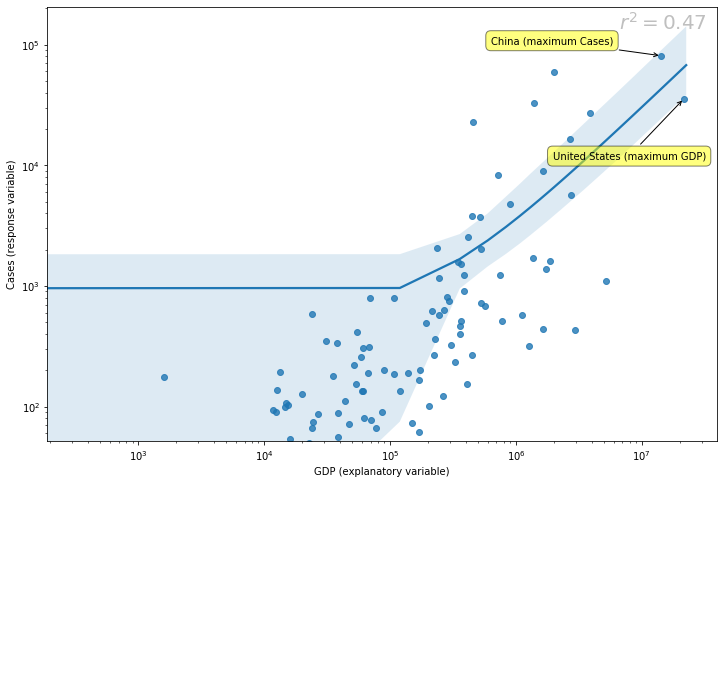

In [123]:

import re
from scipy import stats

rv_min_xytext = (-20, 180)
rv_max_xytext = (-170, 10)
ev_min_xytext = (50, -30)
ev_max_xytext = (-131, -62)
us_xytext = (-6, -6)
columns_list = ['GDP', 'Cases']
show_linear_scatterplot(pandemic_countries_df, columns_list, ev_min_str=None, ev_max_str=None, rv_min_str=None, rv_max_str=None)

In [110]:

for obj_str in ['mas.{}'.format(fn) for fn in dir(mas) if 'ax' in fn.lower()]:
    subobj_list = eval('dir({})'.format(obj_str))
    for sub_obj_str in subobj_list:
        if 'set_yscale' in sub_obj_str:
            print('{}.{}'.format(obj_str, sub_obj_str))
            break

mas._axes.set_yscale
mas._axes_class.set_yscale
mas.axes.set_yscale


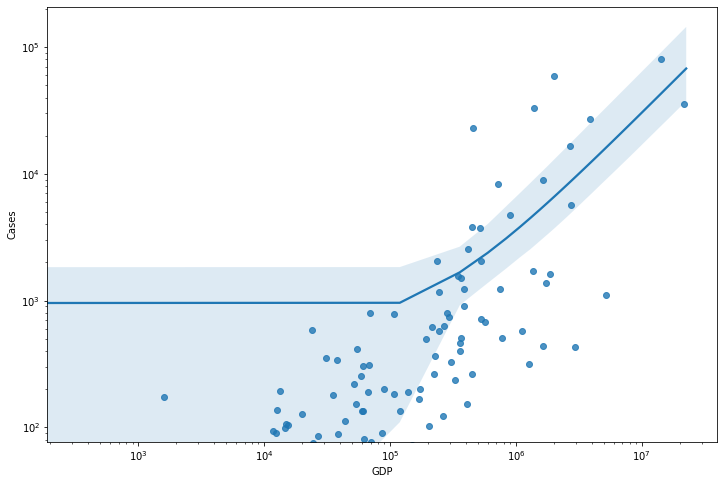

In [111]:
ev_column_name = columns_list[0]
rv_column_name = columns_list[1]
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
mas = sns.regplot(x=ev_column_name, y=rv_column_name,
                  scatter=True, data=pandemic_countries_df, ax=ax)
mas.axes.set_xscale('log')
mas.axes.set_yscale('log')

In [ ]:

for file_name in os.listdir(s.saves_pickle_folder):
    if file_name.endswith('_df.pickle'):
        df_name = file_name.split('.')[0]
        exec("{} = s.load_object('{}')".format(df_name, df_name))
        idx_list = eval("{}.index.tolist()".format(df_name))
        print()
        print(df_name)
        print(idx_list)